# Dicoding Project : Bike Sharing Dataset
## Name : William Devin Septianus Pranggono
## Class : ML-48

# Dataset Information

Data Set Information:
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.  
  
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv  

instant: record index  
dteday : date  
season : season (1:springer, 2:summer, 3:fall, 4:winter)  
yr : year (0: 2011, 1:2012)  
mnth : month ( 1 to 12)  
hr : hour (0 to 23)  
holiday : weather day is holiday or not (extracted from [Web Link])  
weekday : day of the week  
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.  
weathersit :  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)  
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)  
hum: Normalized humidity. The values are divided to 100 (max)  
windspeed: Normalized wind speed. The values are divided to 67 (max)  
casual: count of casual users  
registered: count of registered users  
cnt: count of total rental bikes including both casual and registered  

# Defining Questions

1. How is the trend of total rental bikes from 2011 to 2012?  
2. How is the pattern of the number of rental on different days or hours? 
3. How does the season affect the count of total bikes?   
4. How do the weather and other factors affect the count of total bikes?  
5. How is the proportion between casual and registered rental?  
6. What are the actions that should be done in order to increase the number of rental bikes?

# Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Reading and Assess the Data

In [7]:
hour_path = os.path.join(os.getcwd(), "data", "hour.csv")
day_path = os.path.join(os.getcwd(), "data", "day.csv")

In [8]:
df_hour = pd.read_csv(hour_path)
df_day = pd.read_csv(day_path)

In [9]:
df_hour.head() # Top 5 record

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Both day and hour table have the same features, except there's hr (hour) feature on the hour table. The day table is definitely aggregated from the hour table. To get more detail, I would use the hour table.

In [11]:
df_hour.shape # Shape of the dataset

(17379, 17)

In [12]:
df_hour.info() # The information of each features in the dataset : the data types and the number of non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [13]:
df_hour.describe() # Statistical parameters of each features in the dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


As we see, there aren't any anomalies in the dataset. None of the normalized features have maximum value more than 1, neither minimum lower than zero.  
The things that I have to do here is to denormalized the data to make them more readable. I also need to decode the encoded categorical features to make it easier to understand.  
These actions will be done in cleaning step.

In [14]:
df_hour.isnull().sum() # Check for null values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the output, we could conclude that there's no missing values in the dataset.

In [15]:
df_hour.duplicated().sum()

0

There aren't any duplicated records either.

# Cleaning Data

## Delete unnecessary features

It seems that instant feature isn't needed.

In [16]:
df_hour = df_hour.drop(["instant"], axis=1) # Drop the yr and mnth feature

In [17]:
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Renaming the columns

In [18]:
rename_dict = {"dteday" : "date",
               "yr" : "year",
               "mnth" : "month",
               "hr" : "hour",
              "hum" : "humidity",
              "cnt" : "count"} # Dictionary to rename the columns

In [19]:
df_hour.rename(columns=rename_dict, inplace=True)

In [20]:
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Denormalize the values

In [21]:
df_denormalized = df_hour.copy()

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)  
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)  
hum: Normalized humidity. The values are divided to 100 (max)  
windspeed: Normalized wind speed. The values are divided to 67 (max)  

### Denormalize temp

In [22]:
temp_min = -8
temp_max = 39
df_denormalized["temp"] = df_denormalized["temp"].apply(lambda x: round(temp_min + x*(temp_max-temp_min), 1))

In [23]:
atemp_min = -16
atemp_max = 50
df_denormalized["atemp"] = df_denormalized["atemp"].apply(lambda x: round(atemp_min + x*(atemp_max-atemp_min), 1))

In [24]:
df_denormalized["humidity"] = df_denormalized["humidity"].apply(lambda x: x*100)

In [25]:
df_denormalized["windspeed"] = df_denormalized["windspeed"].apply(lambda x: x*67)

## Decode categorical features to corresponding values described in the dataset information

In [26]:
replacement = [{"season" : {1:"spring", 2:"summer", 3:"fall", 4:"winter"}},
               {"holiday" : {0:"No", 1:"Yes"}},
               {"weekday" : {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 0:"Sunday"}},
               {"workingday" : {0:"No", 1:"Yes"}},
               {"weathersit" : {1:"Clear", 2:"Mist", 3:"Light", 4:"Heavy"}},
               {"year" : {0:2011, 1:2012}}]

In [27]:
df_clear = df_denormalized.copy()

In [28]:
for values in replacement :
    df_clear.replace(values, inplace=True)

In [29]:
df_clear.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,spring,2011,1,0,No,Saturday,No,Clear,3.3,3.0,81.0,0.0,3,13,16
1,2011-01-01,spring,2011,1,1,No,Saturday,No,Clear,2.3,2.0,80.0,0.0,8,32,40
2,2011-01-01,spring,2011,1,2,No,Saturday,No,Clear,2.3,2.0,80.0,0.0,5,27,32
3,2011-01-01,spring,2011,1,3,No,Saturday,No,Clear,3.3,3.0,75.0,0.0,3,10,13
4,2011-01-01,spring,2011,1,4,No,Saturday,No,Clear,3.3,3.0,75.0,0.0,0,1,1


## Change Data Types

In [30]:
df_clear["date"] = pd.to_datetime(df_clear["date"])

In [31]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  int64         
 3   month       17379 non-null  int64         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  object        
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  object        
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [32]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for col in df_clear.columns:
    if df_clear[col].dtype == "object":
        df_clear[col] = df_clear[col].astype("category")
df_clear["weekday"] = pd.Categorical(df_clear["weekday"], categories=days, ordered=True)

In [33]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  int64         
 3   month       17379 non-null  int64         
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: category(5), dateti

This df_clear will be used in Exploratory Data Analysis.

# Exploratory Data Analysis

## Average Count of Rental by Hour

In [34]:
by_hour = df_clear.groupby("hour", as_index=False).agg({"count":"mean"})
by_hour.sort_values(by="count", ascending=False).head()

,hour,count
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352


Mostly, people would have more tendency to rent the bikes at the evening.

## Average Count of Rental by Day

In [35]:
by_day = df_clear.groupby("weekday", as_index=False, observed=True).agg({"count":"mean"})
by_day.sort_values(by="count", ascending=False)

,weekday,count
3,Thursday,196.436665
4,Friday,196.135907
1,Tuesday,191.238891
2,Wednesday,191.130505
5,Saturday,190.209793
0,Monday,183.744655
6,Sunday,177.468825


Thursday has the highest count of rental.

## Average Count of Rental by Month

In [36]:
by_month = df_clear.groupby("month", as_index=False, observed=False).agg({"count":"mean"})
by_month.sort_values(by="count", ascending=False).head()

,month,count
8,9,240.773138
5,6,240.515278
7,8,238.097627
6,7,231.819892
4,5,222.907258


September has the highest count of rental.

## Average Count of Rental by Workingday

In [37]:
by_workingday = df_clear.groupby("workingday", as_index=False, observed=False).agg({"count":"mean"})
by_workingday.sort_values(by="count", ascending=False)

,workingday,count
1,Yes,193.207754
0,No,181.405332


Number of rental on working day is higher.

## Average Count of Rental by Holiday

In [38]:
by_holiday = df_clear.groupby("holiday", as_index=False, observed=False).agg({"count":"mean"})
by_holiday.sort_values(by="count", ascending=False)

,holiday,count
0,No,190.42858
1,Yes,156.87000


Number of rental on holiday is higher.

## Average Count of Rental by Season

In [39]:
by_season = df_clear.groupby("season", as_index=False, observed=False).agg({"count":"mean"})
by_season.sort_values(by="count", ascending=False)

,season,count
0,fall,236.016237
2,summer,208.344069
3,winter,198.868856
1,spring,111.114569


Number of rental on fall is the highest.

## Average Count of Rental by Year

In [40]:
by_year = df_clear.groupby("year", as_index=False, observed=False).agg({"count":"mean"})
by_year.sort_values(by="count", ascending=False)

,year,count
1,2012,234.666361
0,2011,143.794448


2012 has higher number of rental count than 2011.

## Average Count of Rental by Weather Situation

In [41]:
by_weathersit = df_clear.groupby("weathersit", as_index=False, observed=False).agg({"count":"mean"})
by_weathersit.sort_values(by="count", ascending=False)

,weathersit,count
0,Clear,204.869272
3,Mist,175.165493
2,Light,111.579281
1,Heavy,74.333333


The number of rental is the highest when the weather situation is clear.

## Proportion of Casual and Registered Rental

In [42]:
casual = 100*df_clear["casual"].sum()/df_clear["count"].sum()
registered = 100*df_clear["registered"].sum()/df_clear["count"].sum()

print("Casual = {0:.2f} %, Registered = {1:.2f} %".format(casual, registered))

Casual = 18.83 %, Registered = 81.17 %


Most of the rental are registered.

## Correlation between numerical variables

In [43]:
df_clear[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]].corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.987654,-0.069896,-0.023090,0.459605,0.335347,0.404758
atemp,0.987654,1.000000,-0.051936,-0.062332,0.454089,0.332566,0.400938
humidity,-0.069896,-0.051936,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023090,-0.062332,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459605,0.454089,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335347,0.332566,-0.273933,0.082321,0.506618,1.000000,0.972151
count,0.404758,0.400938,-0.322911,0.093234,0.694564,0.972151,1.000000


It could be concluded that there's no strong correlation between these variables. Temperature and feeling temperature have the highest correlation to the rental count, with approximately 0.4, which is relatively moderate correlation.

# Data Visualization

1. How is the trend of total rental bikes from 2011 to 2012?  
2. How is the pattern of the number of rental on different days or hours? 
3. How does the season affect the count of total bikes? On what season the total number of rented bikes increase?  
4. How do the weather and other factors affect the count of total bikes?  
5. How is the proportion between casual and registered rental?  
6. What are the actions that should be done in order to increase the number of rental bikes?

## 1. How is the trend of total rental bikes from 2011 to 2012?

### a. Daily

In [44]:
df_daily = df_clear.groupby(["date"], as_index=False).agg({"count":"sum"})

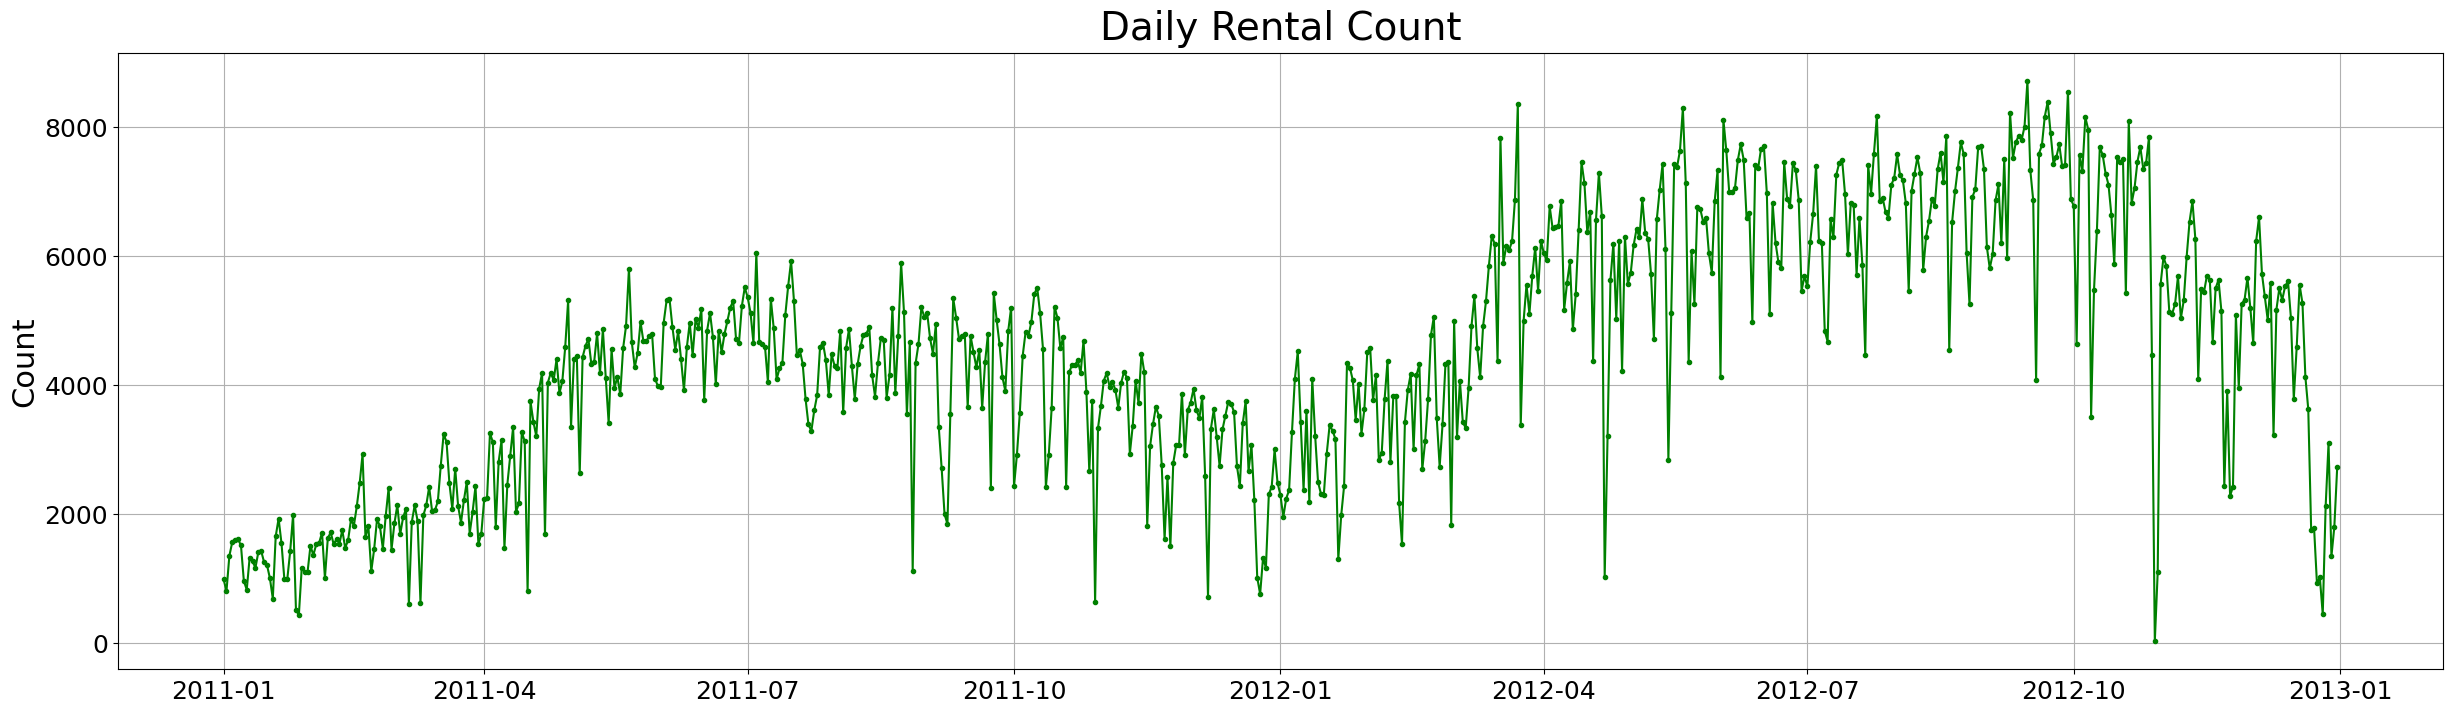

In [45]:
fig = plt.figure(figsize=(30,8))
plt.plot(df_daily["date"], df_daily["count"], marker=".", color="green")
plt.title("Daily Rental Count", loc="center", pad=10, fontsize=28)
plt.ylabel("Count", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

From the plot above, we could conclude that the count of rental in 2012 is generally higher than 2011, although both the highest and lowest number of rental count are also from 2012.  
To make the graphic clearer, let's look at monthly timeframe.

### b. Monthly

In [46]:
df_monthly = df_clear.resample("ME", on="date").agg({"casual":"sum",
                                                    "registered":"sum",
                                                    "count":"sum"})
df_monthly.reset_index(inplace=True)

In [47]:
df_monthly["date"] = df_monthly["date"].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%m"))

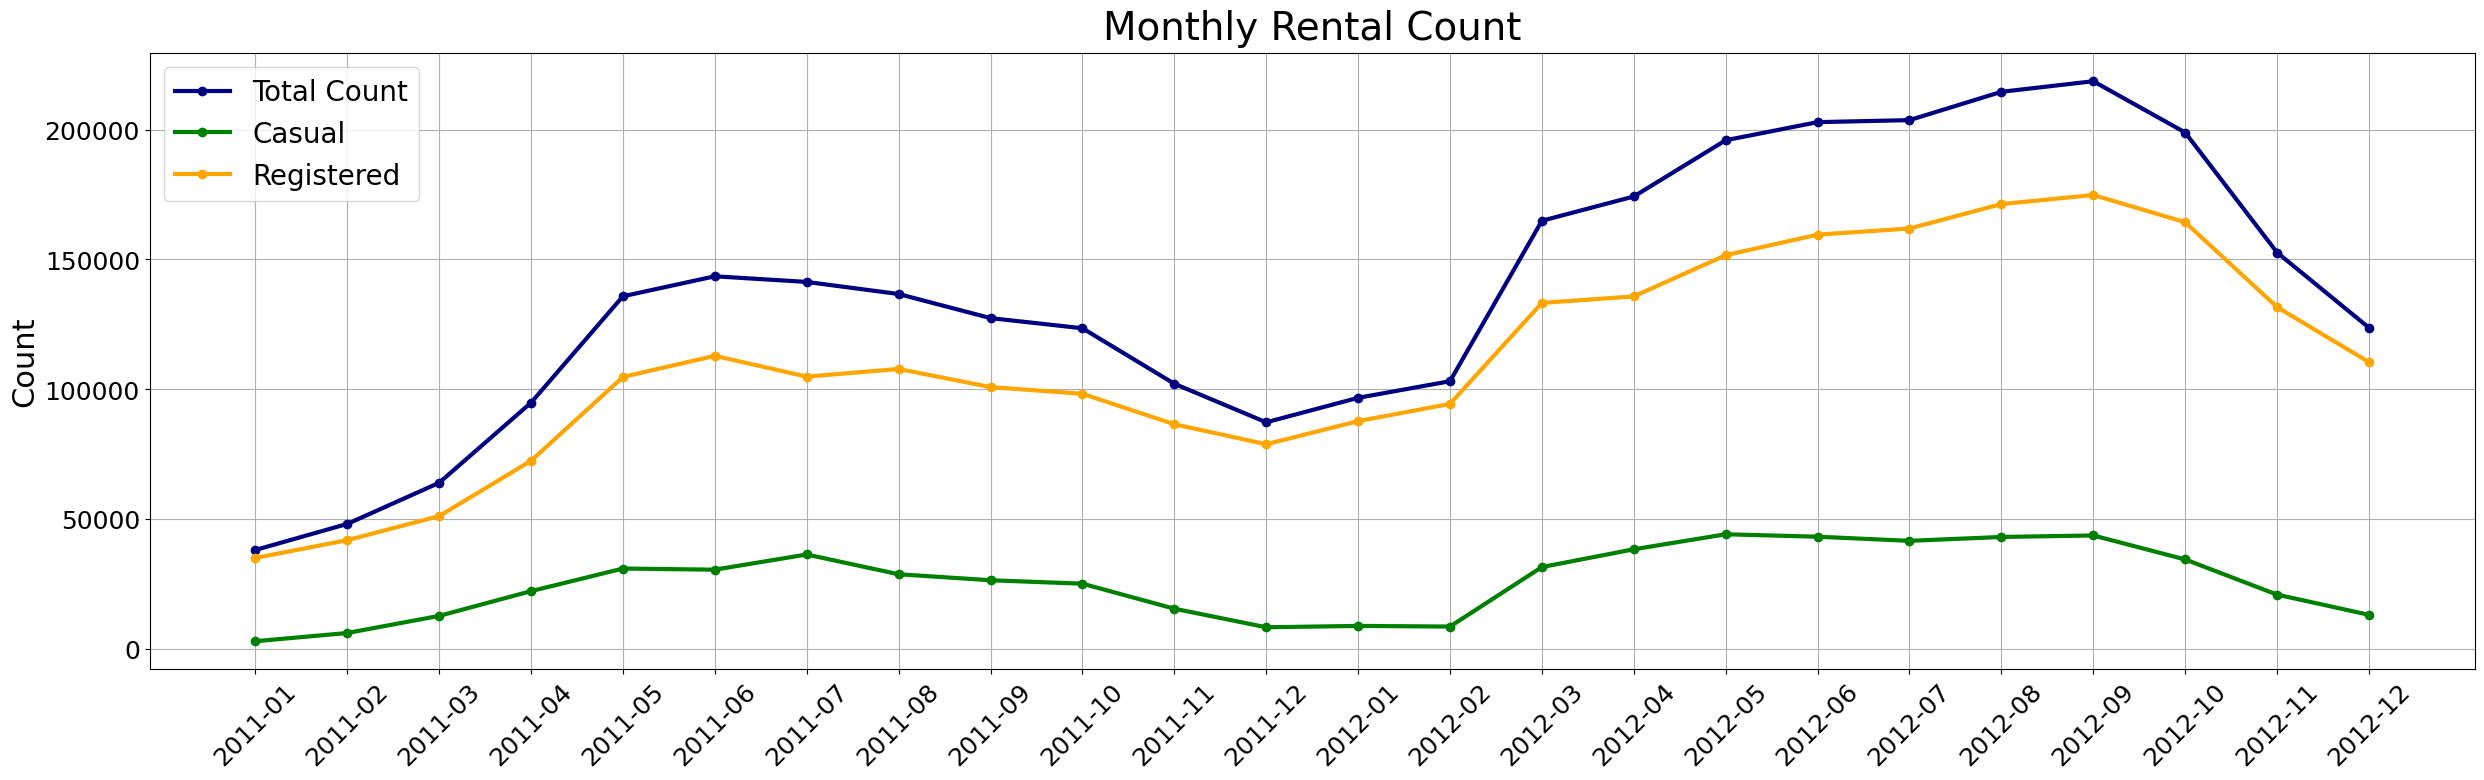

In [48]:
fig = plt.figure(figsize=(30,8))
plt.plot(df_monthly["date"], df_monthly["count"], marker="o", color="navy", linewidth=3, label="Total Count")
plt.plot(df_monthly["date"], df_monthly["casual"], marker="o", color="green", linewidth=3, label="Casual")
plt.plot(df_monthly["date"], df_monthly["registered"], marker="o", color="orange", linewidth=3, label="Registered")
plt.legend(loc="upper left", bbox_to_anchor=(0,0,1,1), fontsize=20)
plt.title("Monthly Rental Count", loc="center", pad=10, fontsize=28)
plt.ylabel("Count", fontsize=22)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.grid(True)
plt.show()

Thus, we could conclude that the bike sharing is on uptrend, where the registered contribute the most of the rental count.

## 2. How is the pattern of the number of rental on different days or hours?

In [49]:
def make_palette(data, column): # Return a list of color codes
    colors = []
    max_value = data[column].max()
    for record in data[column] :
        if record == max_value :
            colors.append("#00005e")
        else :
            colors.append("#0e0ec4")
    return colors

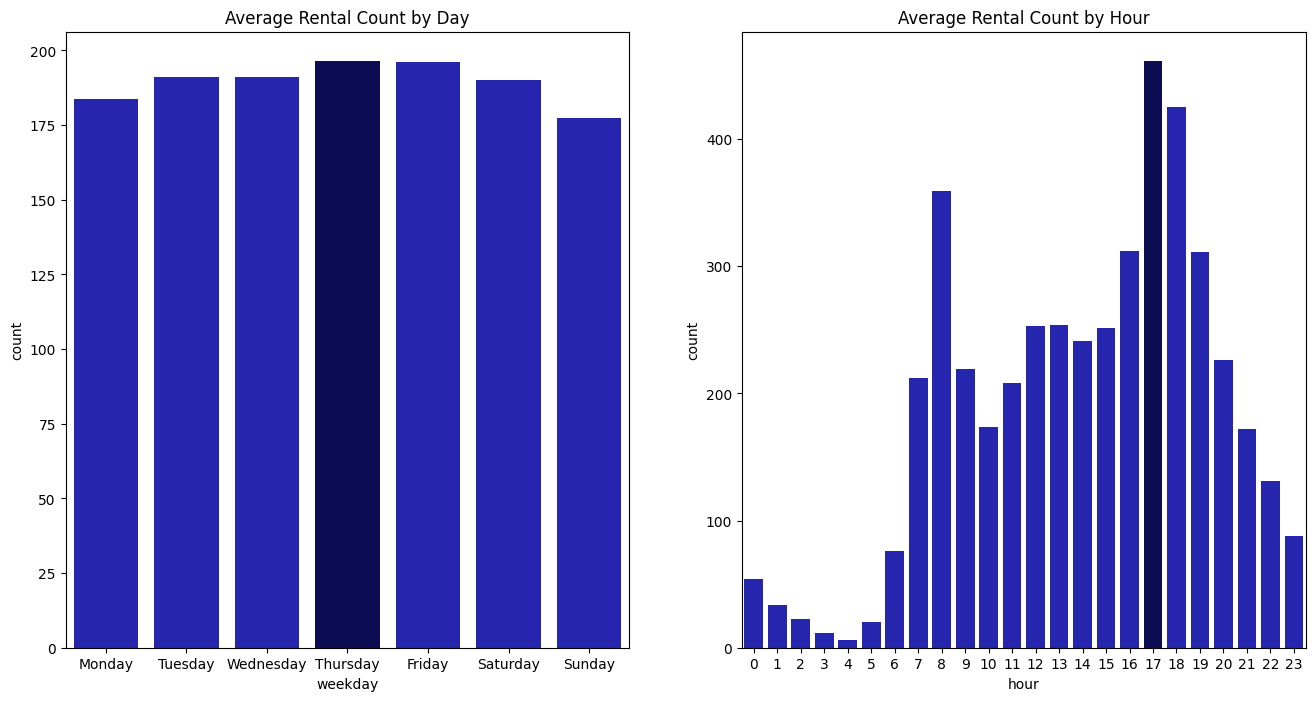

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
sns.set_style({"grid.color":"darkgray"})
sns.barplot(x="weekday", y="count", data=by_day, ax=axs[0],
            palette=make_palette(by_day, "count"), hue="weekday", legend=False)
axs[0].set_title("Average Rental Count by Day")
sns.barplot(x="hour", y="count", data=by_hour, ax=axs[1],
           palette=make_palette(by_hour,  "count"), hue="hour", legend=False)
axs[1].set_title("Average Rental Count by Hour")
plt.show()

From the figure, Thursday and Friday have the highest number of rental count, where usually, the rental count is reach its highest at 5 p.m.; From the bar plot, we could conclude that the rental count increased at the time where people get to work and after office time.

## 3. How does the season affect the count of total bikes?

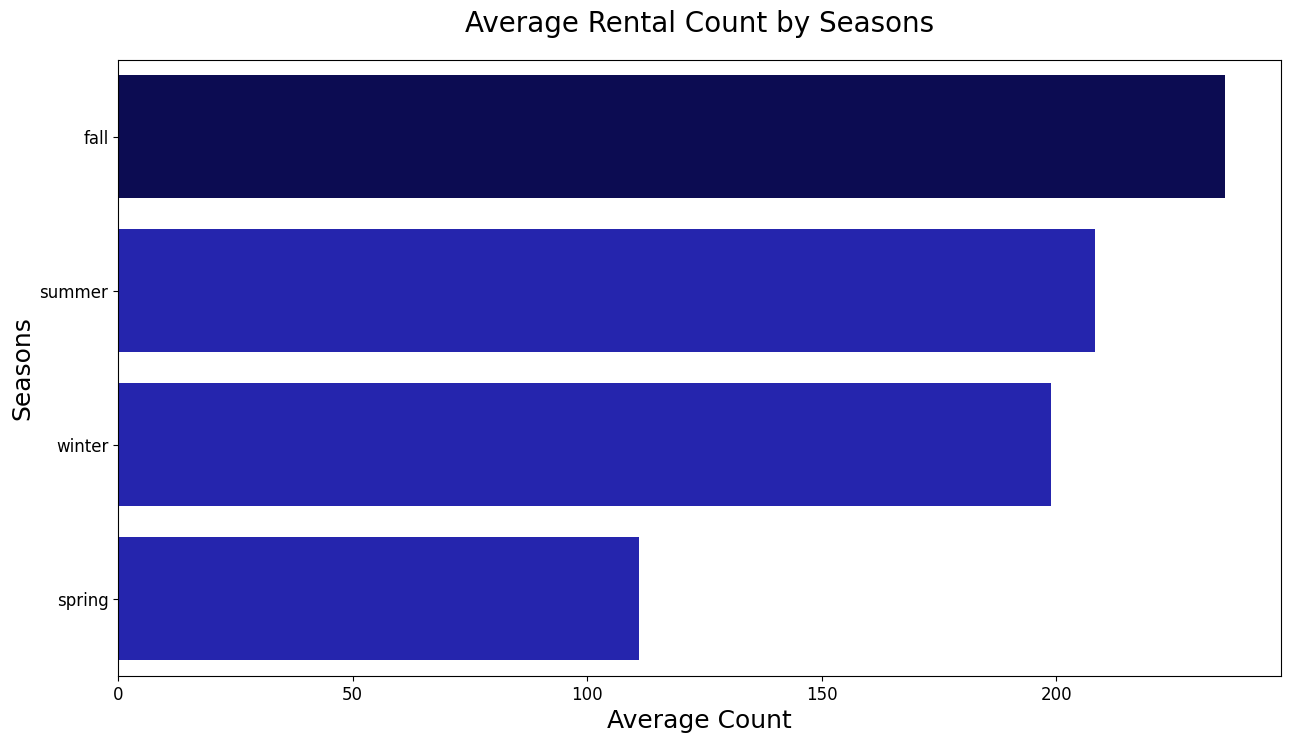

In [51]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x="count", y="season", data=by_season,
            order=by_season.sort_values("count", ascending=False)["season"],
           palette=make_palette(by_season, "count"), hue="season", legend=False)
plt.title("Average Rental Count by Seasons", fontsize=20, loc="center", pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Average Count", fontsize=18)
plt.ylabel("Seasons", fontsize=18)
plt.show()

It could be concluded that on fall, people would like to rent bikes, with average of rental count reaches around 250.

## 4. How do the weather and other factors affect the count of total bikes?

### a. Weather Situation to the Average Rental Count

In [52]:
def make_explode(data, column):
    explodes=[]
    max_value = data[column].max()
    for value in data[column]:
        if value == max_value:
            explodes.append(0.03)
        else :
            explodes.append(0.01)
    return explodes

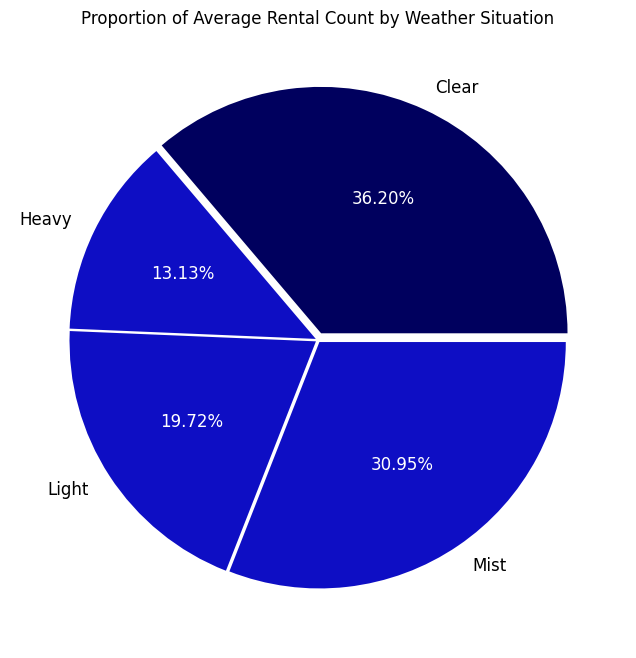

In [53]:
fig = plt.figure(figsize=(8,8))
_, _, autotext = plt.pie(x=by_weathersit["count"], labels=by_weathersit["weathersit"],
                         autopct="%.2f%%", colors = make_palette(by_weathersit, "count"),
                         textprops={"fontsize":"12"}, explode=make_explode(by_weathersit, "count"))
plt.title("Proportion of Average Rental Count by Weather Situation", loc="center")
[txt.set_color("white") for txt in autotext]
plt.show()

In the clear weather, the proportion of the average rental count is the highest, means that people tend to rent the bikes in the clear sky or few clouds.

### b. Correlation between Air Condition to Average Rental Count

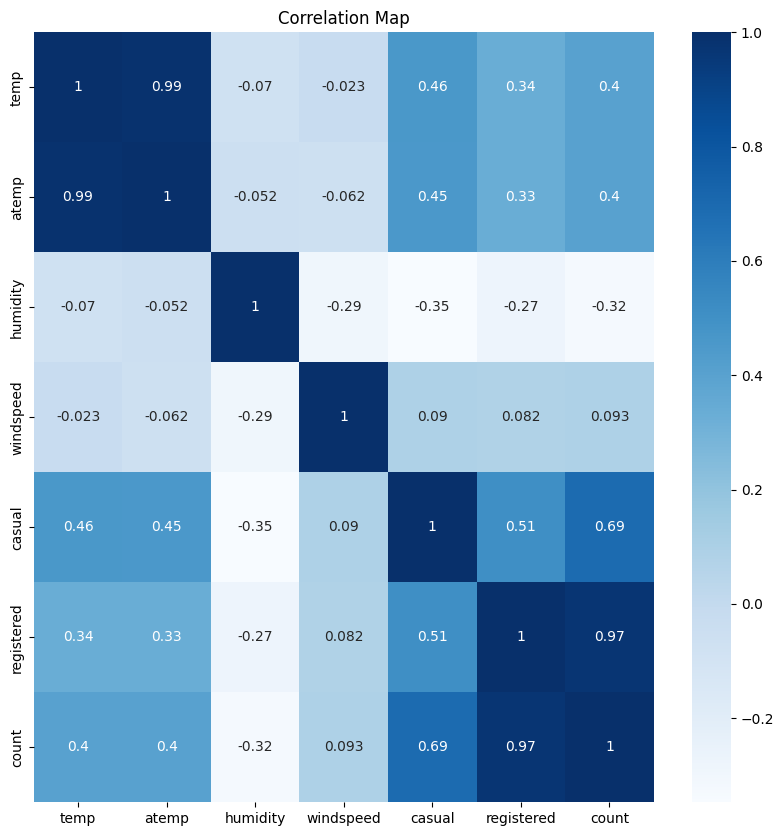

In [54]:
correlation = df_clear[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation Map")
plt.show()

Temperature and the feeling temperature are moderately correlated with the number of rental count. We could conclude that the other factors such as windspeed and humidity aren't correlated with the rental count.  

For a better picture, below is the scatter plot to visualize the correlation.

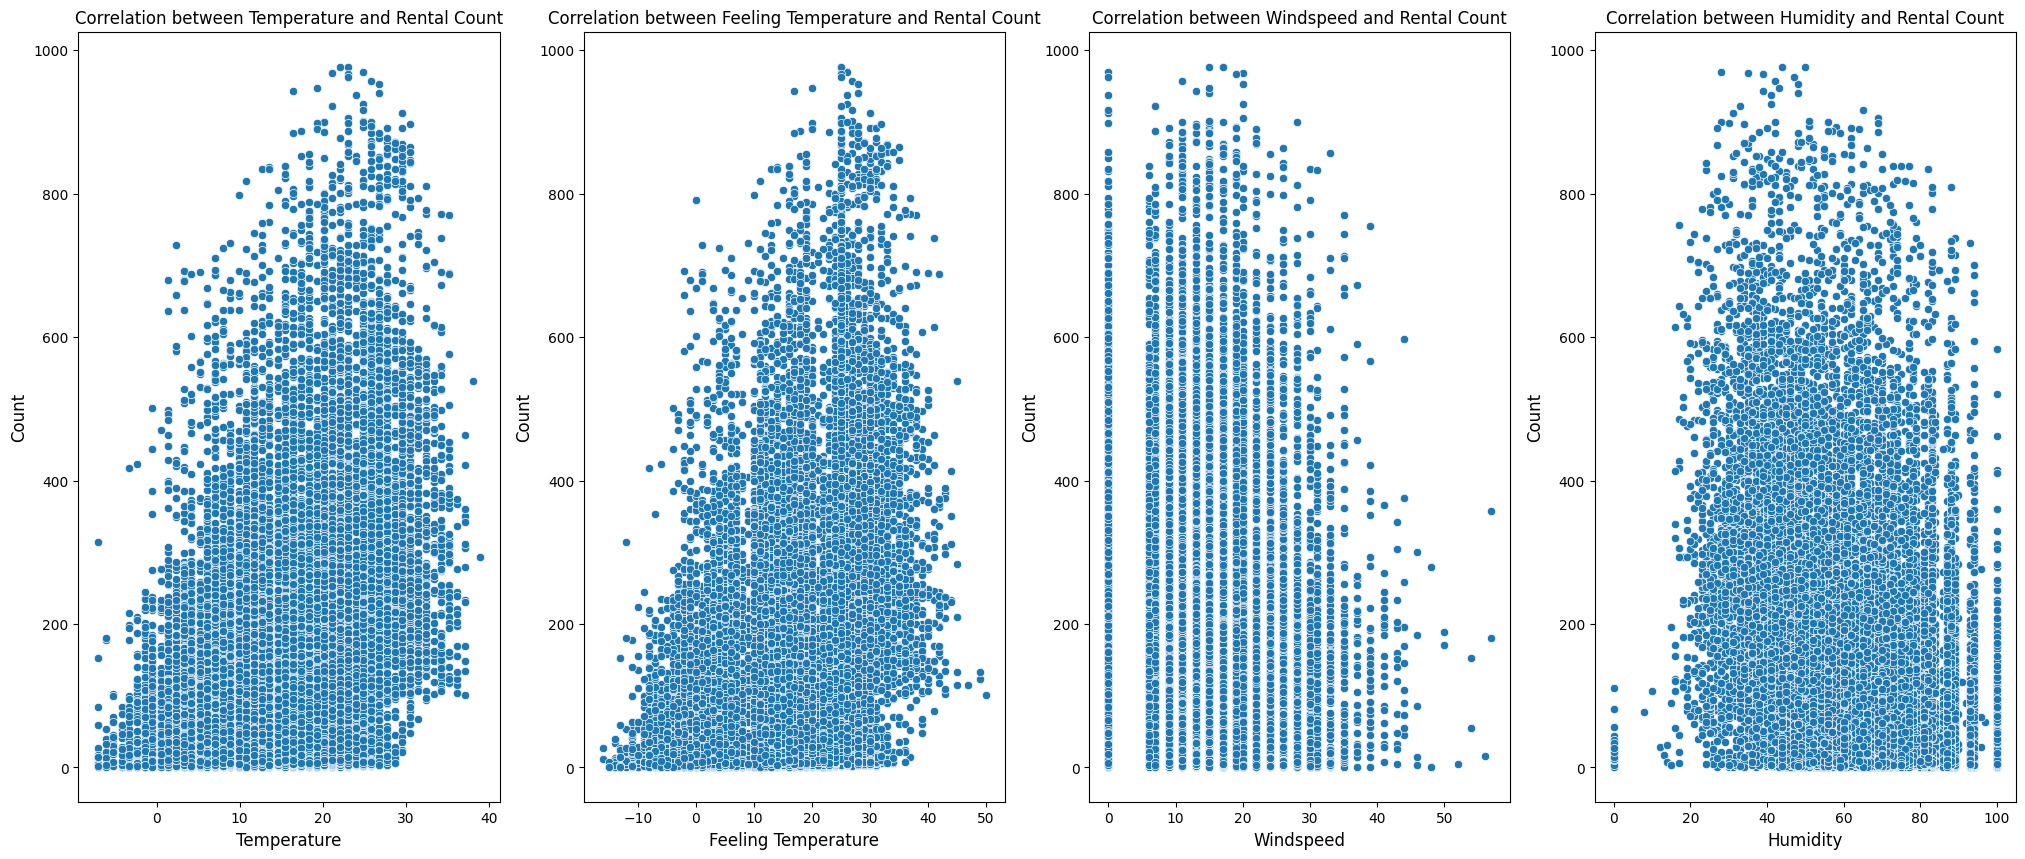

In [55]:
fig, axs = plt.subplots(1, 4, figsize=(25,10))
sns.scatterplot(x="temp", y="count", data=df_clear, ax= axs[0])
sns.scatterplot(x="atemp", y="count", data=df_clear, ax=axs[1])
sns.scatterplot(x="windspeed", y="count", data=df_clear, ax=axs[2])
sns.scatterplot(x="humidity", y="count", data=df_clear, ax=axs[3])
axs[0].set_title("Correlation between Temperature and Rental Count")
axs[0].set_xlabel("Temperature", fontsize=12)
axs[0].set_ylabel("Count", fontsize=12)
axs[1].set_title("Correlation between Feeling Temperature and Rental Count")
axs[1].set_xlabel("Feeling Temperature", fontsize=12)
axs[1].set_ylabel("Count", fontsize=12)
axs[2].set_title("Correlation between Windspeed and Rental Count")
axs[2].set_xlabel("Windspeed", fontsize=12)
axs[2].set_ylabel("Count", fontsize=12)
axs[3].set_title("Correlation between Humidity and Rental Count")
axs[3].set_xlabel("Humidity", fontsize=12)
axs[3].set_ylabel("Count", fontsize=12)
plt.show()

From the sccatterplot, there's tendency in increasing rental count where the temperature is higher. Instead, indeed that high windspeed isn't a right condition for biking. Humidity doesn't seem to have any correlation with rental count.

## 5. How is the proportion between casual and registered rental?

### a. Overall Proportion

In [56]:
casual = df_clear["casual"].sum()
registered = df_clear["registered"].sum()
ratio = pd.DataFrame({"Type":["Casual", "Registered"], "Total":[casual, registered]})
ratio

,Type,Total
0,Casual,620017
1,Registered,2672662


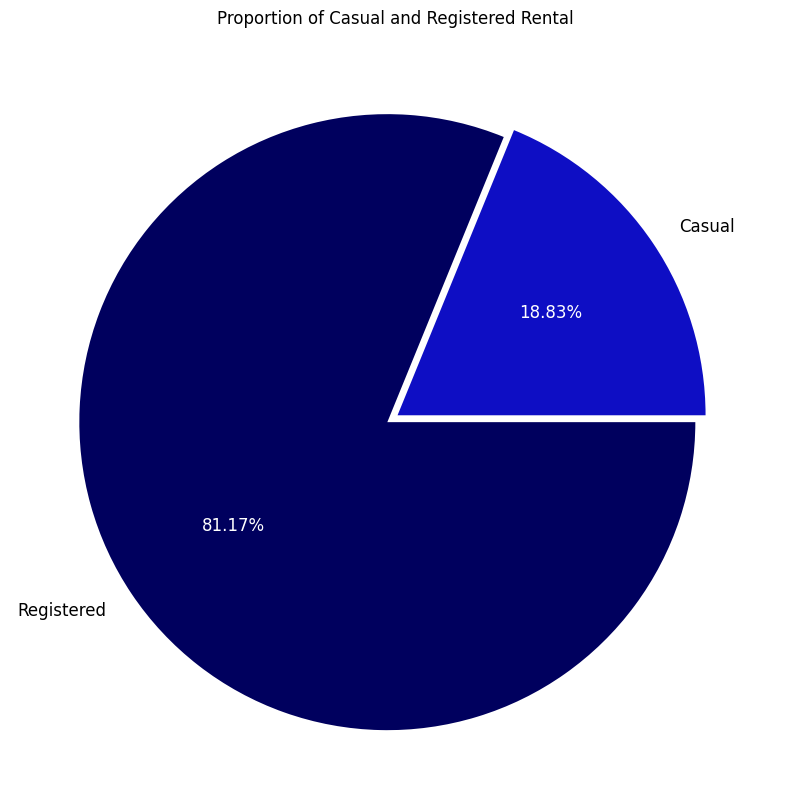

In [57]:
plt.figure(figsize=(10,10))
_, _, autotext = plt.pie(x=ratio["Total"], labels=ratio["Type"],
                         autopct="%.2f%%", colors = make_palette(ratio, "Total"),
                         textprops={"fontsize":"12"}, explode=make_explode(ratio, "Total"))
plt.title("Proportion of Casual and Registered Rental", loc="center")
[txt.set_color("white") for txt in autotext]
plt.show()

From the pie chart above, registered rental contribute 81.17 % of total rental count. This could mean that the customer retention is high.

### b. Breakdown of the Proportion by Categories

In [58]:
season_ratio = df_clear.groupby(["season"], observed=False).agg({"casual":"mean",
                                                                 "registered":"mean"})

In [59]:
monthly_ratio = df_clear.groupby(["month"], observed=False).agg({"casual":"mean",
                                                                 "registered":"mean"})

In [60]:
holiday_ratio = df_clear.groupby(["holiday"], observed=False).agg({"casual":"mean",
                                                                  "registered":"mean"})

In [61]:
weekday_ratio = df_clear.groupby(["weekday"], observed=False).agg({"casual":"mean",
                                                                  "registered":"mean"})

In [62]:
ratio_dict = {"Season":season_ratio,
              "Weekday":weekday_ratio,
              "Month":monthly_ratio,
              "Holiday":holiday_ratio}

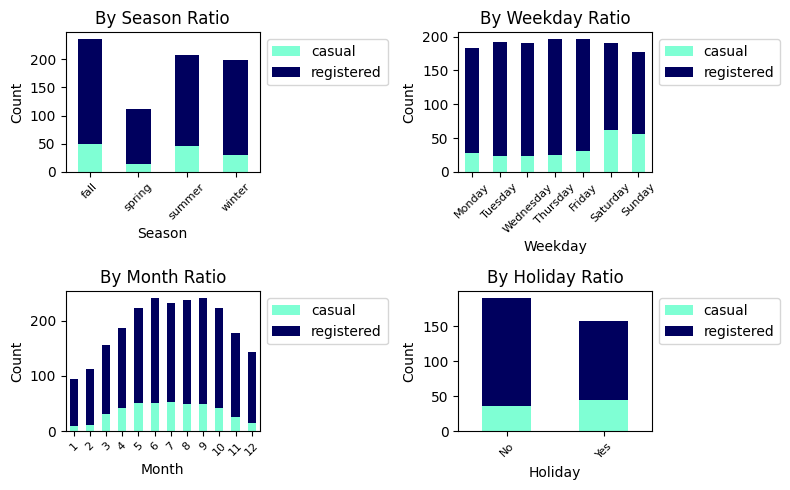

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(8,5))
# plt.suptitle("Proportion of Casual and Registered Rental")
i = 0
for title, data in ratio_dict.items():
    data.plot(kind="bar", stacked=True, color=["aquamarine", "#00005e"], ax=fig.axes[i])
    fig.axes[i].set_title("By {} Ratio".format(title.capitalize()))
    fig.axes[i].set_xlabel(title.capitalize())
    fig.axes[i].set_ylabel("Count")
    fig.axes[i].set_xticklabels(data.index, rotation=45, fontsize=8)
    fig.axes[i].legend(loc="upper left", bbox_to_anchor=(1,1))
    i += 1
plt.tight_layout()
plt.show()

The plots above show that the registered rental count are dominating in all categories.

## 6. What are the actions that should be done in order to increase the number of rental bikes?

a. Spring Advertising Campaign  
From the visualization #3, the rental count is the lowest on spring. Based on this data, the company should do advertising campaign on spring season, such as biking trip, discount after certain miles, etc.

b. Sunday Promotion  
Average rental count on Sunday is surprisingly low, to think that is is car free day. People might use their own transportation to go to entertainment places. The company should do car free day campaign, and increase engagement to customer by promoting the benefits of biking to reduce pollution and keep the body healthy.

c. Reward Membership  
The visualization shows that the customer's retention is high, where most of the rental are registered. So, in order to maintain their loyalty, the company might consider to give them some rewards, and also the casual riders are probably more interested to join as a registered riders with the given benefits.